# Before jumping to the code implementation
***
- Git을 사용하지 않고 해당 ipynb파일만 다운받고 싶으면 wget이나 curl을 사용하여도 좋습니다. 
    - wget https://raw.githubusercontent.com/COMBINE-SKKU/bio_data_mining/master/Lecture4-Regression_with_Regularized_Terms.ipynb
    - curl https://raw.githubusercontent.com/COMBINE-SKKU/bio_data_mining/master/Lecture4-Regression_with_Regularized_Terms.ipynb --output Lecture4-Regression_with_Regularized_Terms.ipynb
<br><br><br>    
- 동영상과 같이 git clone을 사용하고 싶은 학생이 주의하여야 할 점은 git은 원칙적으로 이미 존재하는 디렉토리에는 clone을 하지 않으므로 디렉토리 (예를 들자면 /Documents/BioDataMining)를 지워주고 실행하여야 합니다. 
- Open the terminal and make a directory dedicated for this class code implementation (e.g., mkdir ~/Documents/BioDataMining)
- Install Git (https://git-scm.com/book/en/v2/Getting-Started-Installing-Git)
- Go to the directory for this class, and type: git clone https://github.com/COMBINE-SKKU/bio_data_mining.git
- If you are a newbie for programming a python and jupyter notebook, please install anaconda 
    - Window: https://problemsolvingwithpython.com/01-Orientation/01.03-Installing-Anaconda-on-Windows/
    - Mac: https://problemsolvingwithpython.com/01-Orientation/01.04-Installing-Anaconda-on-MacOS/
    - Linux: https://problemsolvingwithpython.com/01-Orientation/01.05-Installing-Anaconda-on-Linux/
- And learn how to open a jupyter notebook (https://www.youtube.com/watch?v=OJMILWh6ARY)
- Run the following codes.

- Examples from TextBook "O'Reilly book Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow" p134-147
<br><br>

- We learned a linear regression and how to interpret the results. 
- We now know that as increasing the # of independent variables, the accountability (${R}^2$) of the linear regression also increases naturally without having an actually enhanced predicition power (overfitting). 
- How can we avoid the overfitting issue while including all necessary independent variables in the model?

<center><h1>Regularization!</h1></center>

# Ridge Regression
***
$J(\boldsymbol{\beta})=\operatorname{MSE}(\boldsymbol{\beta})+\alpha \frac{1}{2} \sum_{i=1}^{n} \beta_{i}^{2}$
<br>($L_2$ norm regularized term)<br><br>

$\varepsilon=\mathbf{y}-\mathbf{X} \widehat{\boldsymbol{\beta}}$<br>
$\begin{aligned}
\varepsilon^{\prime} \varepsilon &=(\boldsymbol{y}-\boldsymbol{X} \widehat{\boldsymbol{\beta}})^{\prime}(\boldsymbol{y}-\boldsymbol{X} \widehat{\boldsymbol{\beta}}) \\
&=\boldsymbol{y}^{\prime} \boldsymbol{y}-\widehat{\boldsymbol{\beta}}^{\prime} \boldsymbol{X}^{\prime} \boldsymbol{y}-\boldsymbol{y}^{\prime} \boldsymbol{X} \boldsymbol{\beta}+\widehat{\boldsymbol{\beta}}^{\prime} \boldsymbol{X}^{\prime} \boldsymbol{X} \widehat{\boldsymbol{\beta}} \\
&=\boldsymbol{y}^{\prime} \boldsymbol{y}-\mathbf{2} \widehat{\boldsymbol{\beta}}^{\prime} \boldsymbol{X}^{\prime} \boldsymbol{y}+\boldsymbol{\beta}^{\prime} \boldsymbol{X}^{\prime} \boldsymbol{X} \boldsymbol{\beta}
\end{aligned}$<br><br><br>
$\frac{\partial{\varepsilon^{\prime} \varepsilon}}{\partial \widehat{\beta}}+\alpha \frac{\partial{\beta^{2}}}{\partial \widehat{\beta}}=0$<br>
$\mathbf{0}=-2 X^{\prime} y+2 X^{\prime} X \widehat{\beta}+2 \alpha \widehat{\beta}$
$\begin{array}{c}
\left(\boldsymbol{X}^{\prime} \boldsymbol{X}+\boldsymbol{\alpha} \boldsymbol{I}\right) \widehat{\boldsymbol{\beta}}=\boldsymbol{X}^{\prime} \boldsymbol{y} \\
\left(\boldsymbol{X}^{\prime} \boldsymbol{X}+\lambda \boldsymbol{I}\right)^{-1}\left(\boldsymbol{X}^{\prime} \boldsymbol{X}+\boldsymbol{\alpha} \boldsymbol{I}\right) \widehat{\boldsymbol{\beta}}=\left(\boldsymbol{X}^{\prime} \boldsymbol{X}+\boldsymbol{\alpha} \boldsymbol{I}\right)^{-1} \boldsymbol{X}^{\prime} \boldsymbol{y}
\end{array}$

<br><br>
$\widehat{\boldsymbol{\beta}}=\left(\mathbf{X}^{\top}\mathbf{X}+\alpha\mathbf{I}\right)^{-1} \quad \mathbf{X}^{\top}\quad\mathbf{y}$

In [1]:
from sklearn.linear_model import Ridge
import numpy as np

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X - np.mean(X, axis=0), y - np.mean(y))
ridge_reg.predict([[1.5]])

array([[1.44814801]])

In [2]:
import numpy as np

class MyRidge:
    def __init__(self, alpha):
        self.alpha = alpha
        
    def fit(self, X, y):
        leftmat = np.linalg.inv(X.T @ X + self.alpha * np.identity(y.shape[1]))
        self.betas = leftmat @ X.T @ y
    
    def predict(self, X):
        return X @ self.betas
    
clf = MyRidge(alpha=1)
clf.fit(X - np.mean(X, axis=0), y - np.mean(y))
clf.predict([1.5])

array([1.44814801])

# Lasso Regression
***
$J(\boldsymbol{\theta})=\operatorname{MSE}(\boldsymbol{\theta})+\alpha \sum_{i=1}^{n}\left|\theta_{i}\right|$

- Eliminate the weights of the least important features (i.e., set them to zero)
- Performs feature selection and outputs a sparse model
- The Lasso cost function is not differentiable at $\theta_i$ = 0 (for i = 1, 2, ⋯, n), but Gradient Descent still works fine if you use a subgradient vector g instead when any $\theta_i$ = 0.

$g(\boldsymbol{\theta}, J)=\nabla_{\boldsymbol{\theta}} \operatorname{MSE}(\boldsymbol{\theta})+\alpha\left(\begin{array}{c}
\operatorname{sign}\left(\theta_{1}\right) \\
\operatorname{sign}\left(\theta_{2}\right) \\
\vdots \\
\operatorname{sign}\left(\theta_{n}\right)
\end{array}\right) \quad \text { where } \operatorname{sign}\left(\theta_{i}\right)=\left\{\begin{array}{cc}
-1 & \text { if } \theta_{i}<0 \\
0 & \text { if } \theta_{i}=0 \\
+1 & \text { if } \theta_{i}>0
\end{array}\right.$

In [3]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=1)
lasso_reg.fit(X - np.mean(X, axis=0), y - np.mean(y))
lasso_reg.predict([[1.5]])

array([0.96602666])

# Elastic Net
***
$J(\boldsymbol{\theta})=\operatorname{MSE}(\boldsymbol{\theta})+r \alpha \sum_{i=1}^{n}\left|\theta_{i}\right|+\frac{1-r}{2} \alpha \sum_{i=1}^{n} \theta_{i}^{2}$

- A frequently used feature selection tool in neuroimaging studies

In [4]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X - np.mean(X, axis=0), y - np.mean(y))
elastic_net.predict([[1.5]])

array([1.40569612])

# Neuroimaging application
***
- functional magnetic resonance imaging (fMRI) allows to probe neuronal activities of the human brain in vivo. 
- The outcome of fMRI scan is time-series of functional signals (BOLD) across the whole brain. 
<br><br><img src='https://raw.githubusercontent.com/COMBINE-SKKU/combine-skku/master/class/week4/Fig4-15.png' width="600"/>

# Connectome-based Predictive Modeling (CPM)
***
<img src='https://raw.githubusercontent.com/COMBINE-SKKU/combine-skku/master/class/week4/Fig4-16.png'>
<br>

- Credit for the code examples
    - https://github.com/YaleMRRC/CPM
    - https://github.com/esfinn/cpm_tutorial

In [5]:
import os
import urllib.request

workdir = "./cpm_examples/"
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/esfinn/cpm_tutorial/master/"
filenames = ['unrelated_subIDs_n337.txt', 'unrestricted_behav_data_n337.csv', 'shen268_coords.csv']
os.makedirs(workdir, exist_ok=True)

for filename in filenames:
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + filename
    urllib.request.urlretrieve(url, workdir + filename)

In [6]:
import pandas as pd
import numpy as np

subj_list = pd.read_csv(workdir + 'unrelated_subIDs_n337.txt', header=None)
subj_list = np.array(subj_list, dtype=str).flatten()

all_behav_data = pd.read_csv(workdir + 'unrestricted_behav_data_n337.csv', dtype={'Subject': str})
all_behav_data.set_index('Subject', inplace=True) 
print(all_behav_data.shape)
all_behav_data.head() 

(337, 581)


,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,3T_Full_Task_fMRI,...,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
Subject,,,,,,,,,,,,,,,,,,,,,
100206,S900,Q11,M,26-30,True,1,1,4,100,True,...,6.0,108.79,97.19,1.0,49.7,72.63,72.03,1.84,0.0,1.84
100610,S900,Q08,M,26-30,True,2,1,4,100,True,...,2.0,122.25,110.45,0.0,38.6,84.84,85.31,1.92,1.0,1.88
101006,S500,Q06,F,31-35,True,2,2,4,100,True,...,6.0,122.25,111.41,0.0,38.6,123.80,123.31,1.80,0.0,1.80
101309,S500,Q06,M,26-30,True,1,1,4,100,True,...,5.2,122.25,110.45,0.0,38.6,106.39,104.39,1.80,0.0,1.80
101915,Q3,Q04,F,31-35,True,2,2,4,100,True,...,4.4,96.87,77.61,0.0,38.6,112.11,111.70,1.84,1.0,1.80


In [7]:
def read_in_matrices(subj_list, file_suffix=None, data_dir=None, zscore=False):
    """
    Reads in a set of individual-subject connectivity matrices stored in data_dir,
    
    Returns a dataframe that is subjects x edges (by vectorizing the upper triangle of each FC matrix).
    
    Assumes:
    - each matrix is stored in a separate file beginning with the subject ID, and
    - matrices are symmetric (squareform); i.e., for a parcellation with 268 nodes, matrices should be 268 x 268
    """
    
    all_fc_data = {}
            
    for subj in subj_list[:50]:
        # try to find this subject's matrix
        if file_suffix:
            file = [f for f in os.listdir(data_dir) if subj in f and file_suffix in f]
        else:
            file = [f for f in os.listdir(data_dir) if subj in f]
            
        # make sure there is one and only one file    
        if len(file) ==0:
            raise ValueError("No data found for subject {}".format(subj))
        if len(file) >1:
            raise ValueError("More than one matrix found for subject {}! Specify a suffix?".format(subj))
        
        # read it in and make sure it's symmetric and has reasonable dimensions
        tmp = np.loadtxt(data_dir + file[0])
        assert tmp.shape[0]==tmp.shape[1]>1, "Matrix seems to have incorrect dimensions: {}".format(tmp.shape)
        
        # take just the upper triangle and store it in a dictionary
        if ~zscore:
            all_fc_data[subj] = tmp[np.triu_indices_from(tmp, k=1)]
        if zscore:
            all_fc_data[subj] = sp.stats.zscore(tmp[np.triu_indices_from(tmp, k=1)])
        
    # Convert dictionary into dataframe
    all_fc_data = pd.DataFrame.from_dict(all_fc_data, orient='index')
    
    return all_fc_data

# Download and load Functional Connectivity matrices
- https://drive.google.com/file/d/14sxUuiia_1Ie5E9T7zT5jZepfPRLDz4F/view?usp=sharing

In [8]:
all_fc_data = read_in_matrices(subj_list, file_suffix='REST', data_dir='/Users/hongsukjun/Downloads/cpm_tutorial-master/fc_data_REST/')
print(all_fc_data.shape)
all_fc_data.head()

(50, 35778)


,0,1,2,3,4,5,6,7,8,9,...,35768,35769,35770,35771,35772,35773,35774,35775,35776,35777
100206,-0.0126,0.32330,0.07675,-0.00935,0.07315,-0.03645,0.03920,-0.05085,0.11115,-0.10385,...,0.07700,-0.05335,-0.05960,0.07340,-0.07035,-0.02345,0.11240,0.08575,-0.00065,-0.04875
100610,0.0264,0.13705,0.03880,-0.00515,0.12650,0.27320,0.23310,0.16515,0.15775,0.03840,...,0.00200,0.08050,0.04145,0.06880,0.00990,0.09700,0.02340,0.09375,0.20835,0.09985
101006,-0.0329,-0.02075,-0.01470,0.08315,0.17685,0.17075,0.03220,0.02115,0.17490,0.12475,...,0.07970,-0.00350,-0.25130,-0.13555,-0.07430,-0.05355,-0.08735,0.07910,-0.01705,0.06920
101309,0.0710,0.11620,0.00425,0.03905,0.20200,0.20185,0.31185,0.11320,0.11270,0.19250,...,-0.01435,0.01745,0.01105,0.03210,0.05005,0.02760,-0.04655,0.05080,0.02065,-0.00720
101915,0.0832,0.27890,0.12290,-0.00755,0.09600,0.09895,0.21355,-0.22720,0.17240,-0.08715,...,0.06410,-0.04185,0.18670,0.09770,0.28130,0.13695,0.01230,-0.07145,0.06930,0.09660


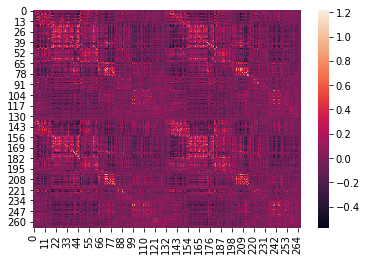

In [9]:
# Visualize the FC of one case
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp

s = 0

sns.heatmap(sp.spatial.distance.squareform(all_fc_data.iloc[s,:]))
plt.show()

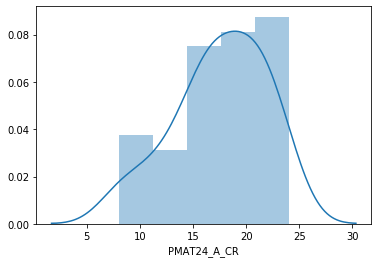

behavioral data: (50,)
FC data: (50, 35778)


In [10]:
# Fluid Intelligence Quotient
behav = 'PMAT24_A_CR'
behav_data = all_behav_data[behav][:50]

sns.distplot(behav_data)
plt.show()

print('behavioral data: ' + str(np.shape(behav_data)))
print('FC data: ' + str(np.shape(all_fc_data)))

In [14]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold

alphas = 10**np.linspace(10,-2,100)*0.5 # specify alphas to search
rg_grid = GridSearchCV(Ridge(normalize=False), cv=10, param_grid={'alpha':alphas}, iid=False)

reg = Pipeline([
  ('feature_selection', SelectFromModel(ElasticNet(alpha=0.1, l1_ratio=0.5))),
  ('regression', rg_grid)
])

cv5 = KFold(n_splits=5, random_state=665)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [17]:
import time
from sklearn.model_selection import cross_val_predict

start = time.time() # time the function
all_pred = cross_val_predict(reg, all_fc_data, behav_data, cv=cv5, n_jobs=4)
# all_score = cross_val_score(reg, all_edges.T, all_behav, cv=rpcv10, n_jobs=1) # repeated kfolds
end = time.time()
print(end - start) # print function running time

4.630114793777466


In [18]:
def plot_predictions(prediction, observation, tail="glm"):
    x = prediction
    y = observation

    g = sns.regplot(x=x.T.squeeze(), y=y.T.squeeze(), color='gray')
    ax_min = min(min(g.get_xlim()), min(g.get_ylim()))
    ax_max = max(max(g.get_xlim()), max(g.get_ylim()))
    g.set_xlim(12, 23)
    g.set_ylim(0, 30)
    
    r = sp.stats.pearsonr(x,y)[0]
    g.annotate('r = {0:.2f}'.format(r), xy = (0.7, 0.1), xycoords = 'axes fraction')
    
    return g

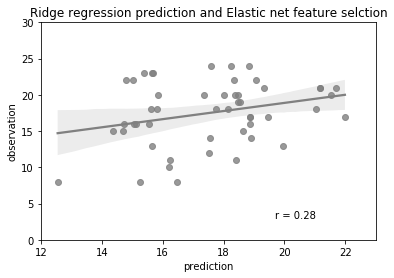

(0.28413944514169853, 0.045524075397130506)


In [19]:
g = plot_predictions(all_pred.T, behav_data)
g.set_title('Ridge regression prediction and Elastic net feature selction')
plt.xlabel('prediction')
plt.ylabel('observation')
plt.show()

print(sp.stats.pearsonr(all_pred.T, behav_data))